# Telco Customer Churn - Exploratory Data Analysis

This notebook performs exploratory data analysis on the Telco Customer Churn dataset to understand factors that influence customer churn.

## 1. Setup and Data Loading

Import necessary libraries and load the dataset from Kaggle.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
path = r'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Initial Data Exploration

Examine the dataset structure, data types, and basic statistics.

In [3]:
# Dataset information
print("Dataset Info:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nUnique values per column:")
print(df.nunique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [4]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# View unique values for categorical columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')
            print()

print_unique_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



## 3. Data Cleaning

Handle data type issues and clean the dataset.

In [6]:
# Drop customerID (not useful for analysis)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (currently stored as object/string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with 0 (likely new customers with no charges yet)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("Data cleaning completed!")
print(f"Missing values: {df.isnull().sum().sum()}")

Data cleaning completed!
Missing values: 0


## 4. Target Variable Analysis

Analyze the distribution of the target variable (Churn).

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


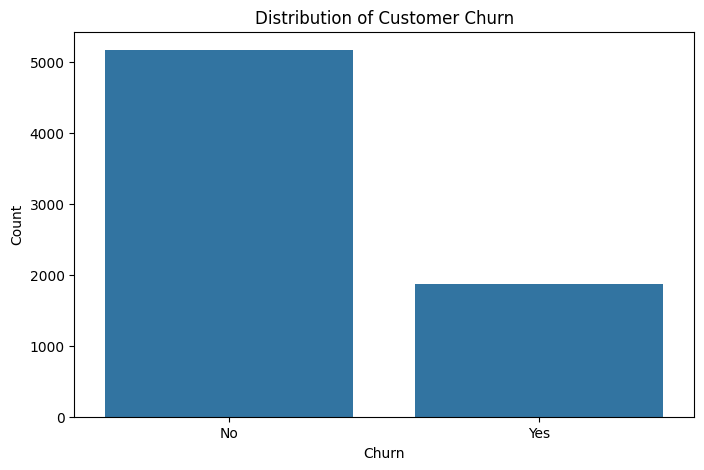

In [7]:
# Churn distribution
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Customer Churn')
plt.ylabel('Count')
plt.show()

## 5. Univariate Analysis

Analyze individual features to understand their distributions.

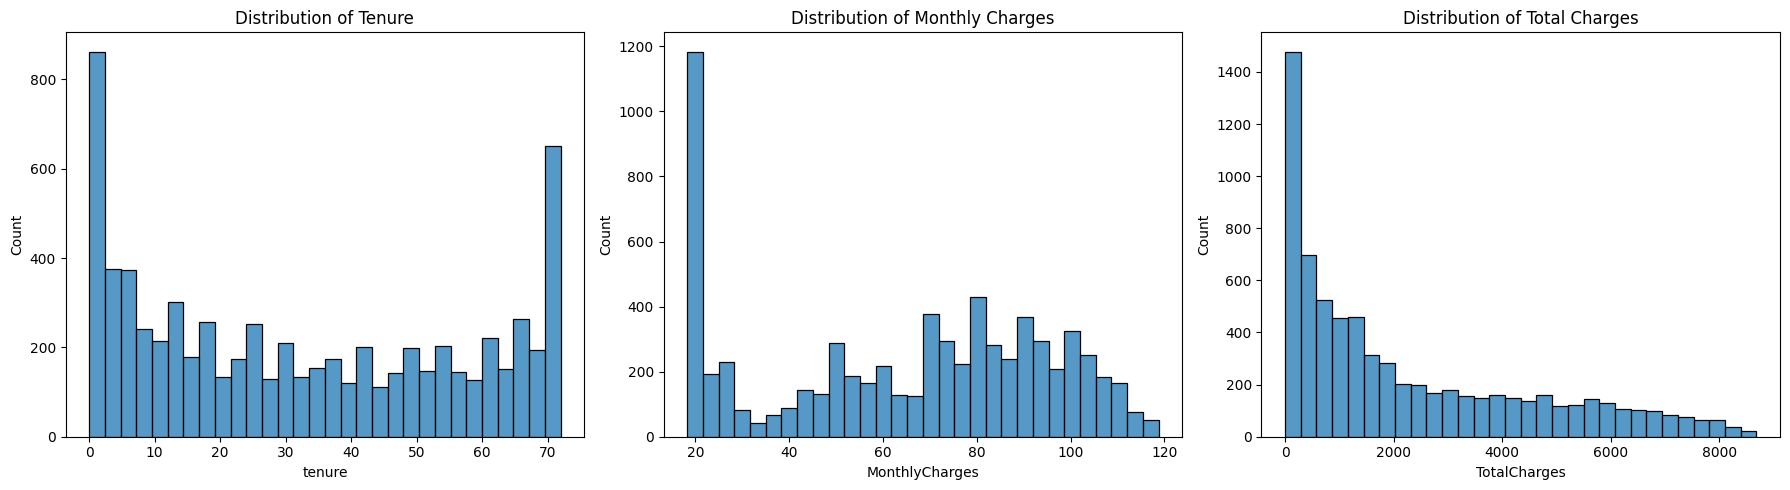

In [8]:
# Numerical features distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['tenure'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Tenure')

sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')

sns.histplot(df['TotalCharges'], bins=30, ax=axes[2])
axes[2].set_title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

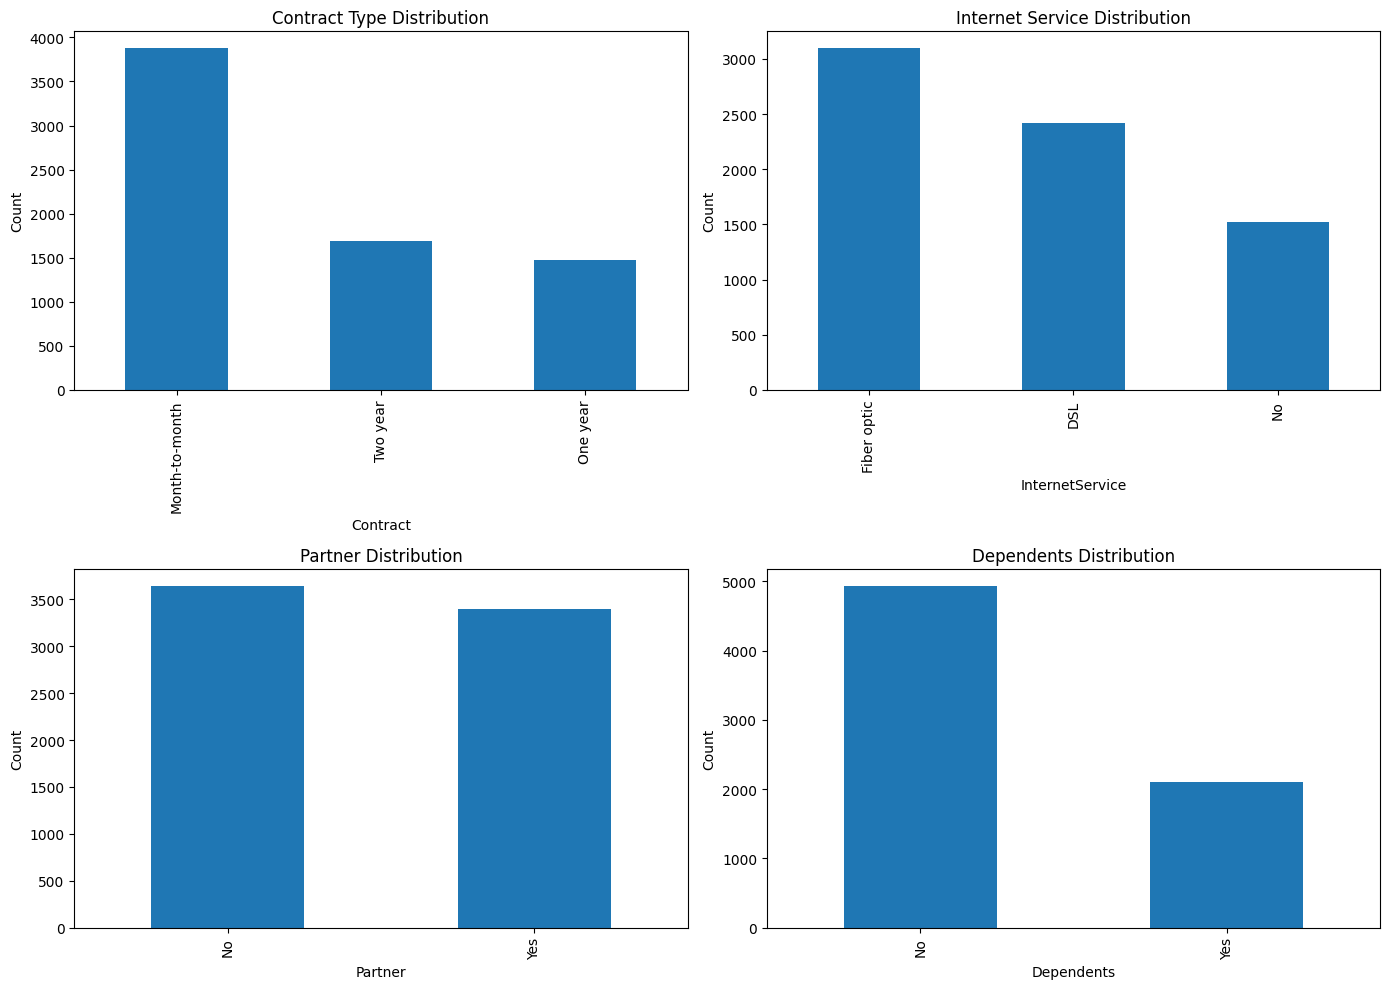

In [9]:
# Key categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Contract type
df['Contract'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Contract Type Distribution')
axes[0, 0].set_ylabel('Count')

# Internet Service
df['InternetService'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Internet Service Distribution')
axes[0, 1].set_ylabel('Count')

# Partner
df['Partner'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Partner Distribution')
axes[1, 0].set_ylabel('Count')

# Dependents
df['Dependents'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Dependents Distribution')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 6. Bivariate Analysis - Churn vs Features

Analyze relationships between features and churn to identify key drivers.

### 6.1 Numerical Features vs Churn

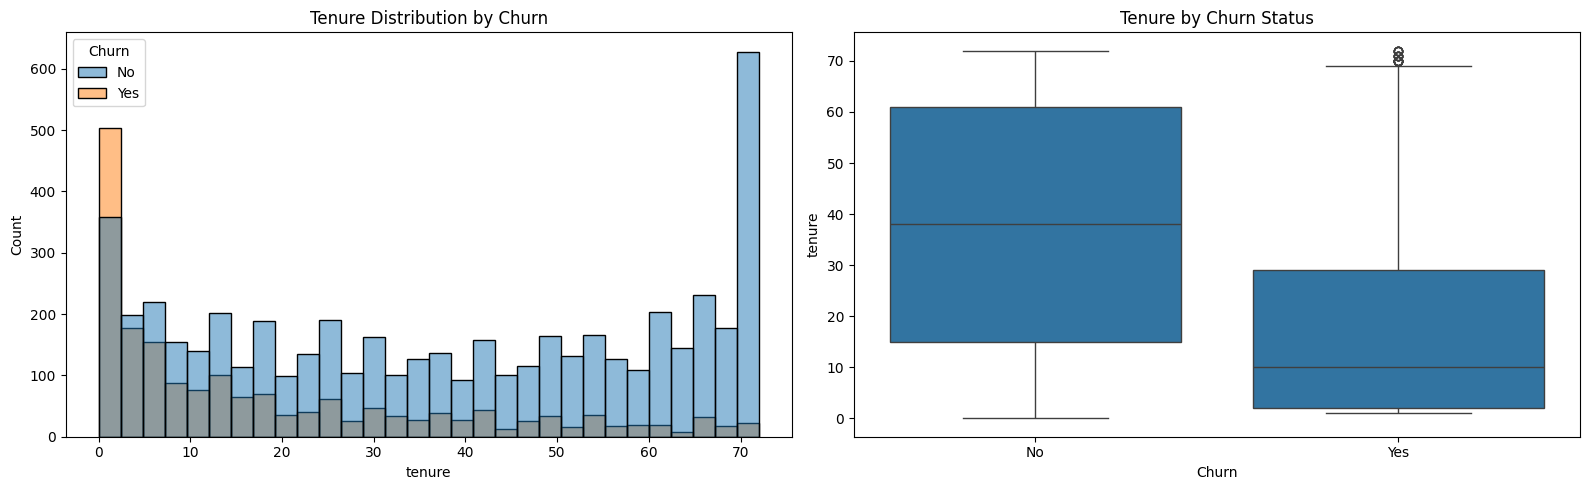

In [10]:
# Tenure vs Churn
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, x='tenure', hue='Churn', bins=30, ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn')

sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[1])
axes[1].set_title('Tenure by Churn Status')

plt.tight_layout()
plt.show()

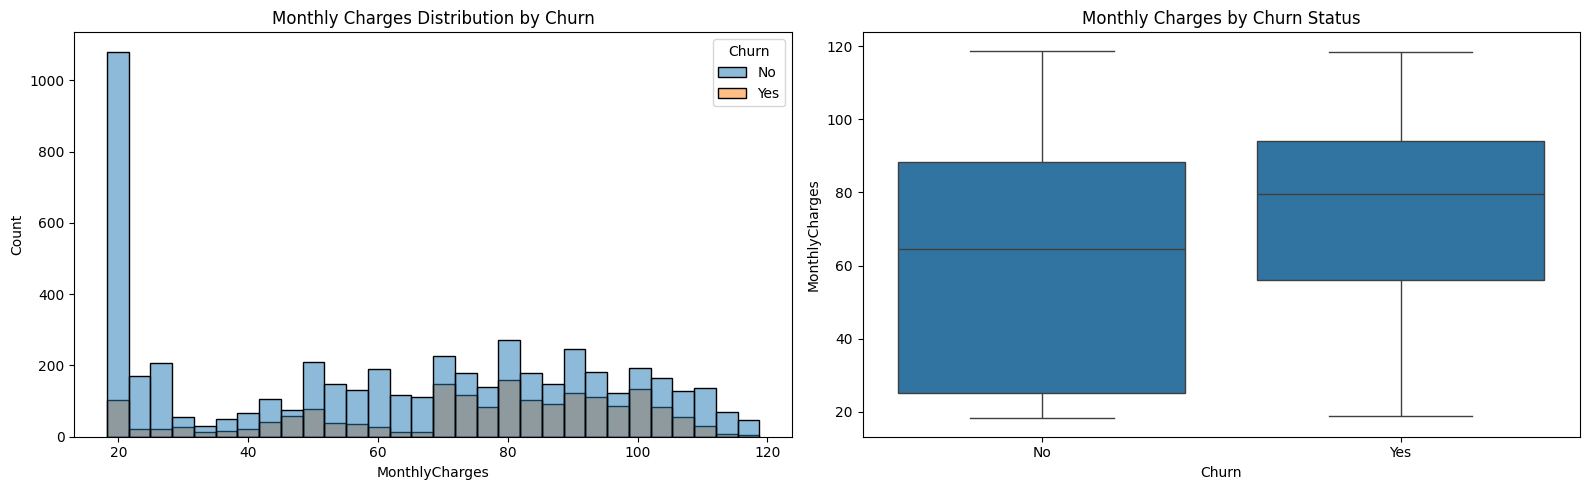

In [11]:
# Monthly Charges vs Churn
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn')

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status')

plt.tight_layout()
plt.show()

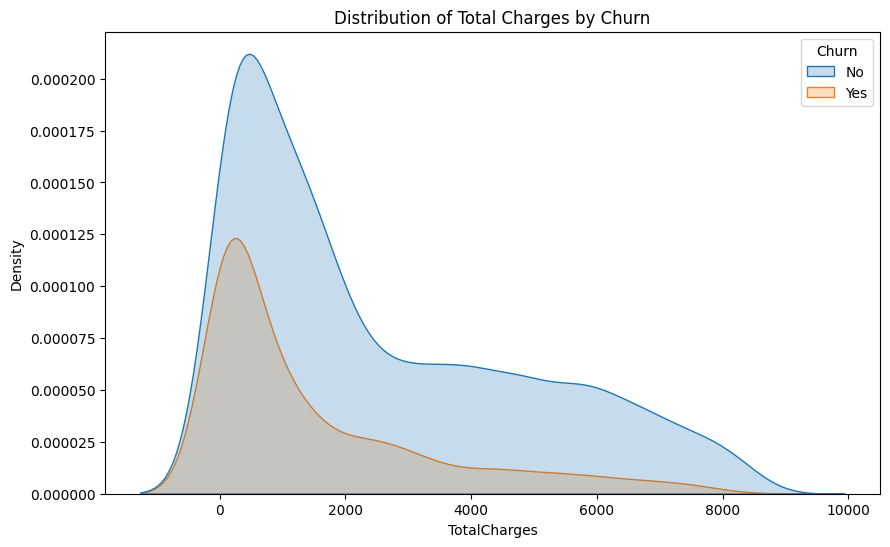

In [12]:
# Total Charges vs Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Distribution of Total Charges by Churn')
plt.show()

### 6.2 Categorical Features vs Churn

Churn Rate by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319



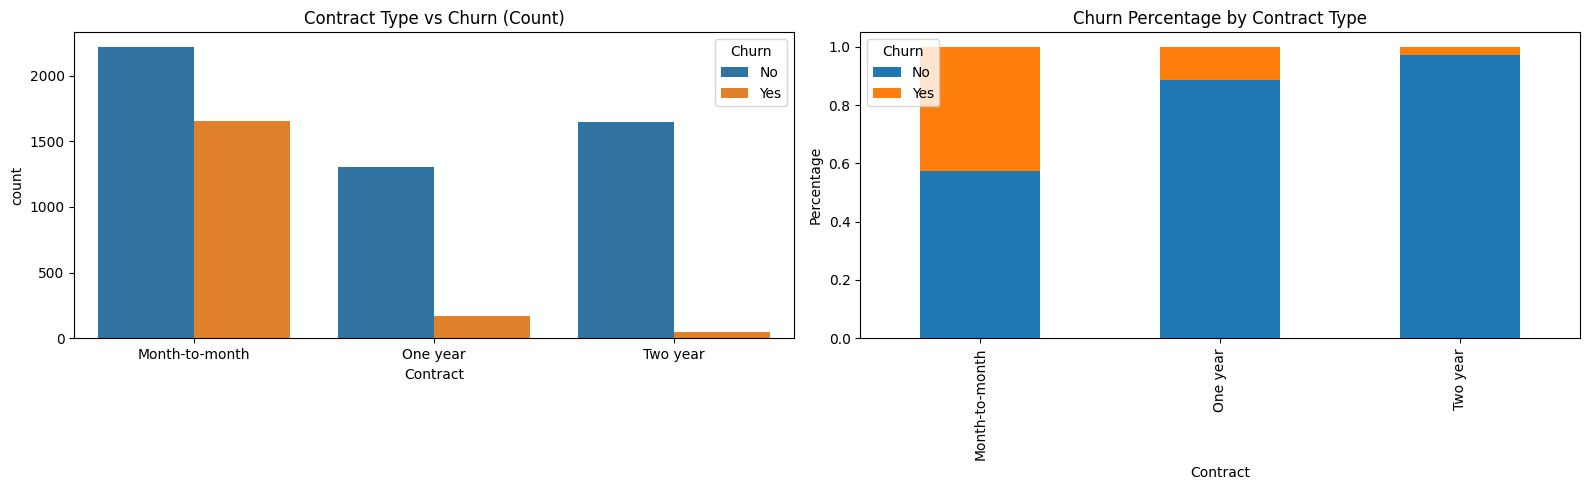

In [13]:
# Contract Type vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
print("Churn Rate by Contract Type:")
print(contract_churn)
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0])
axes[0].set_title('Contract Type vs Churn (Count)')

contract_churn.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn Percentage by Contract Type')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

Churn Rate by Internet Service:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050



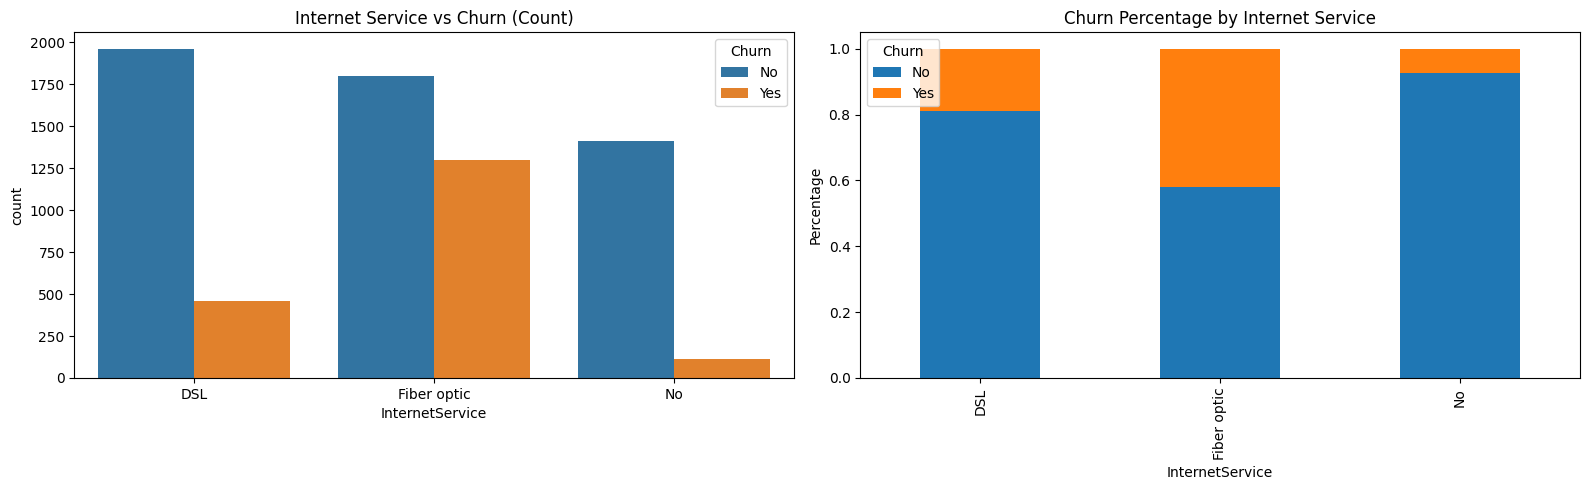

In [14]:
# Internet Service vs Churn
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
print("Churn Rate by Internet Service:")
print(internet_churn)
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0])
axes[0].set_title('Internet Service vs Churn (Count)')

internet_churn.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn Percentage by Internet Service')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

Churn Rate by Senior Citizen Status:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813



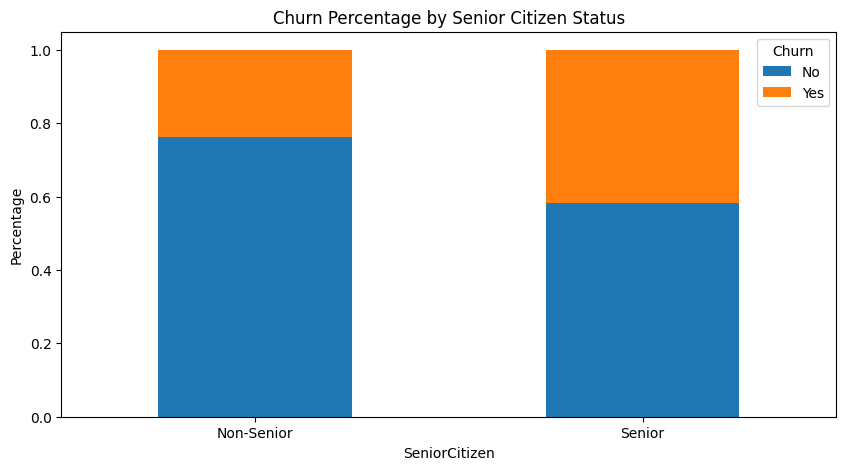

In [15]:
# Senior Citizen vs Churn
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')
print("Churn Rate by Senior Citizen Status:")
print(senior_churn)
print()

senior_churn.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.ylabel('Percentage')
plt.title('Churn Percentage by Senior Citizen Status')
plt.xticks([0, 1], ['Non-Senior', 'Senior'], rotation=0)
plt.show()

### 6.3 Service Features vs Churn

Analyze security and support services impact on churn.

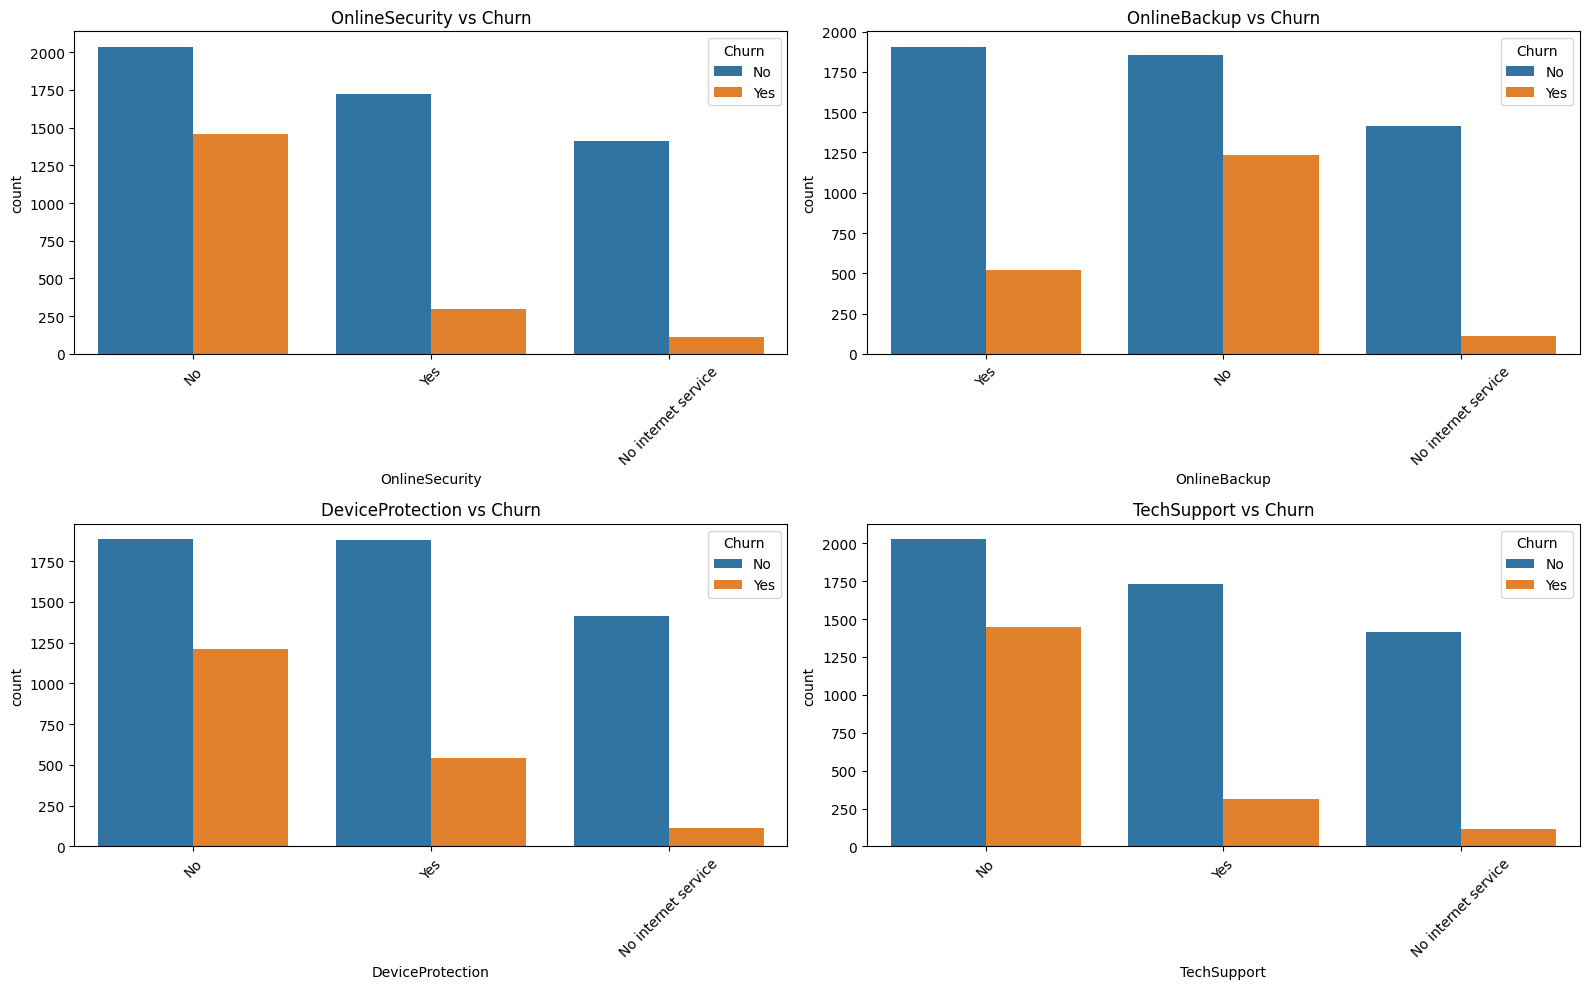

Churn Rates by Security/Support Services:

OnlineSecurity:
Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112

OnlineBackup:
Churn                      No       Yes
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315

DeviceProtection:
Churn                      No       Yes
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021

TechSupport:
Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


In [16]:
# Security and Support Services
security_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

plt.figure(figsize=(16, 10))
for i, col in enumerate(security_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print churn rates for each service
print("Churn Rates by Security/Support Services:")
print("=" * 50)
for col in security_cols:
    churn_rate = pd.crosstab(df[col], df['Churn'], normalize='index')
    print(f"\n{col}:")
    print(churn_rate)

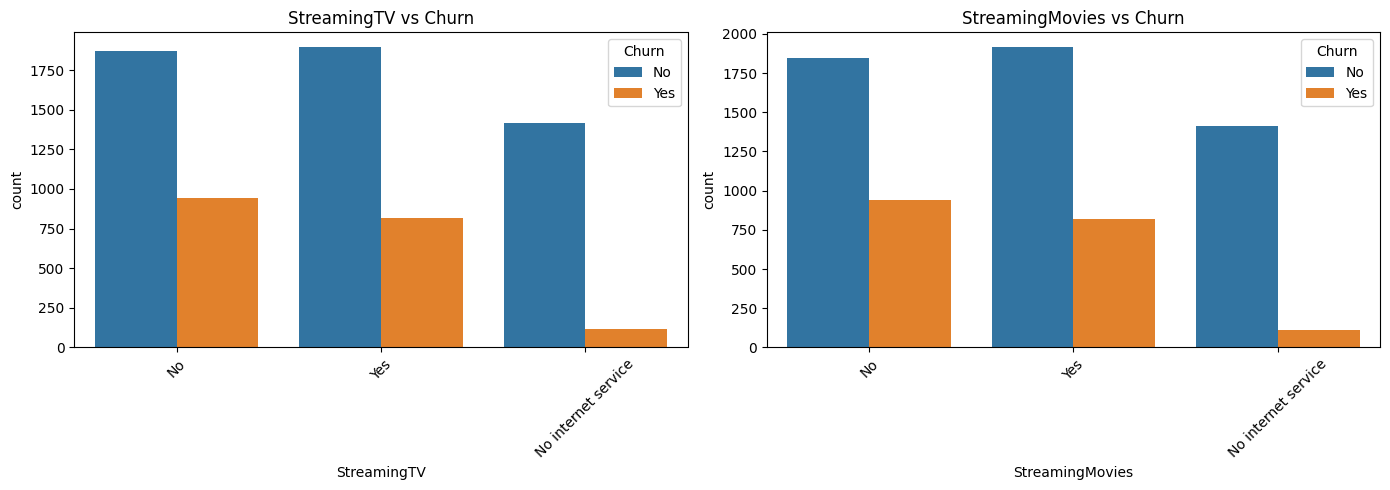

Churn Rates by Streaming Services:

StreamingTV:
Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702

StreamingMovies:
Churn                      No       Yes
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


In [17]:
# Streaming Services
streaming_cols = ['StreamingTV', 'StreamingMovies']

plt.figure(figsize=(14, 5))
for i, col in enumerate(streaming_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print churn rates
print("Churn Rates by Streaming Services:")
print("=" * 50)
for col in streaming_cols:
    churn_rate = pd.crosstab(df[col], df['Churn'], normalize='index')
    print(f"\n{col}:")
    print(churn_rate)

## 7. Key Insights Summary

Summary of findings from the exploratory data analysis.

In [18]:
print("KEY FINDINGS:")
print("=" * 70)
print("\n1. CHURN RATE:")
churn_pct = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"   Overall churn rate: {churn_pct:.2f}%")

print("\n2. CONTRACT TYPE:")
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')['Yes'] * 100
print(f"   Month-to-month: {contract_churn['Month-to-month']:.2f}% churn")
print(f"   One year: {contract_churn['One year']:.2f}% churn")
print(f"   Two year: {contract_churn['Two year']:.2f}% churn")

print("\n3. INTERNET SERVICE:")
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')['Yes'] * 100
for service in internet_churn.index:
    print(f"   {service}: {internet_churn[service]:.2f}% churn")

print("\n4. TENURE:")
avg_tenure_churned = df[df['Churn'] == 'Yes']['tenure'].mean()
avg_tenure_retained = df[df['Churn'] == 'No']['tenure'].mean()
print(f"   Average tenure (churned): {avg_tenure_churned:.2f} months")
print(f"   Average tenure (retained): {avg_tenure_retained:.2f} months")

print("\n5. MONTHLY CHARGES:")
avg_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
avg_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"   Average monthly charges (churned): ${avg_charges_churned:.2f}")
print(f"   Average monthly charges (retained): ${avg_charges_retained:.2f}")

print("\n" + "=" * 70)

KEY FINDINGS:

1. CHURN RATE:
   Overall churn rate: 26.54%

2. CONTRACT TYPE:
   Month-to-month: 42.71% churn
   One year: 11.27% churn
   Two year: 2.83% churn

3. INTERNET SERVICE:
   DSL: 18.96% churn
   Fiber optic: 41.89% churn
   No: 7.40% churn

4. TENURE:
   Average tenure (churned): 17.98 months
   Average tenure (retained): 37.57 months

5. MONTHLY CHARGES:
   Average monthly charges (churned): $74.44
   Average monthly charges (retained): $61.27

